In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
col_pal =  plt.rcParams["axes.prop_cycle"].by_key()["color"]
import plotly.express as px
plt.style.use ("fivethirtyeight")
from fredapi import Fred
import env
pd.set_option("max_columns",500)
import json

In [2]:
fred_key = ""
# from kaggle_secrets import UserSecretsClients
# secrets = UserSecretsClients()
# fred_key = secrets.getsecret("fred-api")

In [3]:
fred=Fred(api_key = fred_key)

In [4]:
fred

In [5]:
# fred.search("S&P", order_by = "popularity")
fred.search("S&P").head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
SP500,SP500,2022-11-03,2022-11-03,S&P 500,2012-11-05,2022-11-02,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2022-11-02 19:10:51-05:00,84,The observations for the S&P 500 represent the...
VXVCLS,VXVCLS,2022-11-03,2022-11-03,CBOE S&P 500 3-Month Volatility Index,2007-12-04,2022-11-02,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2022-11-03 08:36:07-05:00,53,"Copyright, 2016, Chicago Board Options Exchang..."
VXOCLS,VXOCLS,2022-11-03,2022-11-03,CBOE S&P 100 Volatility Index: VXO (DISCONTINUED),1986-01-02,2021-09-23,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2021-09-24 08:36:03-05:00,37,This series is no longer being updated by the ...
CSUSHPINSA,CSUSHPINSA,2022-11-03,2022-11-03,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-08-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2022-10-25 08:02:01-05:00,91,"For more information regarding the index, plea..."
CSUSHPISA,CSUSHPISA,2022-11-03,2022-11-03,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-08-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2022-10-25 08:02:03-05:00,81,"For more information regarding the index, plea..."


# Pull Raw Data 


In [6]:
sp500 = fred.get_series(series_id = "SP500")

<AxesSubplot:title={'center':'S&P 500'}>

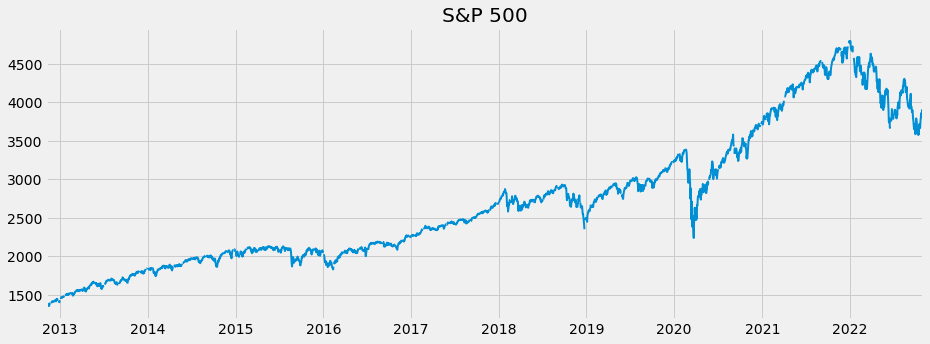

In [7]:
sp500.plot(figsize= (14,5), title = "S&P 500", lw = 2)

# 4. Pull multiple data series

In [8]:
unemp_results = fred.search("unemployment")

In [9]:
unemp_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2022-11-03,2022-11-03,Unemployment Rate,1948-01-01,2022-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-10-07 07:44:01-05:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2022-11-03,2022-11-03,Unemployment Rate,1948-01-01,2022-09-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-10-07 07:43:02-05:00,59,The unemployment rate represents the number of...
NROU,NROU,2022-11-03,2022-11-03,Noncyclical Rate of Unemployment,1949-01-01,2032-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2022-05-26 13:45:04-05:00,71,"Starting with the July, 2021 report: An Update..."
UNEMPLOY,UNEMPLOY,2022-11-03,2022-11-03,Unemployment Level,1948-01-01,2022-09-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2022-10-07 07:44:02-05:00,70,The series comes from the 'Current Population ...
CCSA,CCSA,2022-11-03,2022-11-03,Continued Claims (Insured Unemployment),1967-01-07,2022-10-22,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2022-11-03 07:33:03-05:00,70,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRUN64TTCAM156S,LRUN64TTCAM156S,2022-11-03,2022-11-03,Unemployment Rate: Aged 15-64: All Persons for...,1976-01-01,2022-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-08-11 15:02:10-05:00,6,OECD descriptor ID: LRUN64TT OECD unit ID: STS...
ASHE737URN,ASHE737URN,2022-11-03,2022-11-03,"Unemployment Rate in Asheville, NC (MSA)",1990-01-01,2022-09-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-11-02 10:08:26-05:00,4,None
LRUN74TTEUA156N,LRUN74TTEUA156N,2022-11-03,2022-11-03,Unemployment Rate: Aged 15-74: All Persons for...,1998-01-01,2019-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2020-04-17 11:56:18-05:00,4,OECD descriptor ID: LRUN74TT OECD unit ID: ST ...


In [10]:
#PULL FROM ID IN UNEMP RESULTS
unemp_rate = fred.get_series("UNRATE")

In [11]:
unemp_rate.head()

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
dtype: float64

<AxesSubplot:>

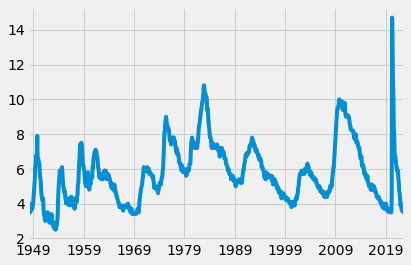

In [12]:
unemp_rate.plot()

In [13]:
unemp_df = fred.search("unemployment rate state", filter = ("frequency", "Monthly" ))
# running a query to find specific data that I am looking for
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df["title"].str.contains("Unemployment Rate")]

In [24]:
unemp_df.index

Index(['UNRATE', 'LNS14000006', 'CAUR', 'M0892AUSM156SNBR', 'LNS14000031',
       'M0892BUSM156SNBR', 'LNS14000024', 'TXUR', 'LNS14000002', 'NYUR',
       'FLUR', 'U2RATE', 'LNS14000009', 'LNS14000001', 'LNS14027662',
       'LNS14000003', 'LNS14027660', 'OHUR', 'ALUR', 'PAUR', 'MIUR', 'KYUR',
       'ILUR', 'LRUN64TTUSM156S', 'NJUR', 'MAUR', 'AKUR', 'WIUR', 'COUR',
       'INUR', 'MOUR', 'NCUR', 'LNS14032183', 'MNUR', 'LNS14000012', 'VAUR',
       'NDUR', 'LASMT261982000000003', 'TNUR', 'WAUR', 'AZUR', 'IAUR', 'GAUR',
       'UTUR', 'LNS14027659', 'LAUR', 'ORUR', 'ARUR', 'SCUR', 'OKUR', 'WVUR',
       'NMUR', 'LNS14000018', 'HIUR', 'KSUR', 'MDUR', 'LASMT391746000000003',
       'MSUR', 'LNS14024887', 'MTUR', 'NVUR', 'WYUR', 'DCUR', 'CTUR', 'NEUR',
       'SDUR', 'IDUR', 'RIUR', 'LNS14000060', 'MEUR', 'PRUR', 'NHUR',
       'LNS14000036', 'VTUR', 'CMWRUR', 'LNS14000032', 'LNS14000028', 'DEUR',
       'LRHUTTTTUSM156S', 'CNERUR', 'LNS14000026', 'LNS14000029',
       'LNS14027689', 'LRUN

In [19]:
all_results = []
for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name = myid)
    all_results.append(results)
    

In [31]:
# dropping none state data 
pd.concat(all_results, axis = 1).drop(["M0892BUSM156SNBR"], axis = 1)

SyntaxError: invalid syntax (1554340537.py, line 2)